In [14]:
import numpy as np
from numpy import linalg
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
from PIL import Image

In [15]:
imagem = Image.open('CD.png')
imagem = imagem.convert('L')
imagem = np.array(imagem)


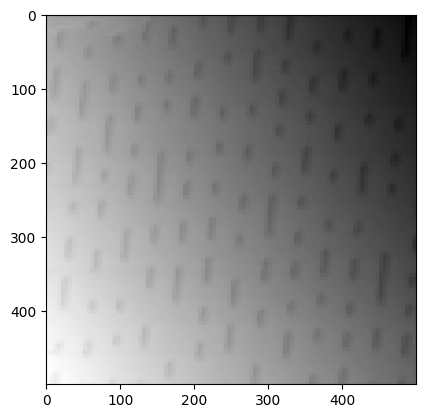

In [16]:
plt.imshow(imagem, cmap='gray')

In [17]:
def desentortar(imagem_qualquer):
    x, y = np.meshgrid(np.arange(imagem_qualquer.shape[1]), np.arange(imagem_qualquer.shape[0]))
    A = np.vstack((x.ravel(), y.ravel(), np.ones(x.size))).T
    B = imagem_qualquer.ravel()
    fit = np.linalg.lstsq(A, B, rcond=None)[0]
    plano_de_fundo = fit[0] * x + fit[1] * y + fit[2]

    imagem_nivelada = imagem_qualquer - plano_de_fundo
    
    return imagem_nivelada, plano_de_fundo

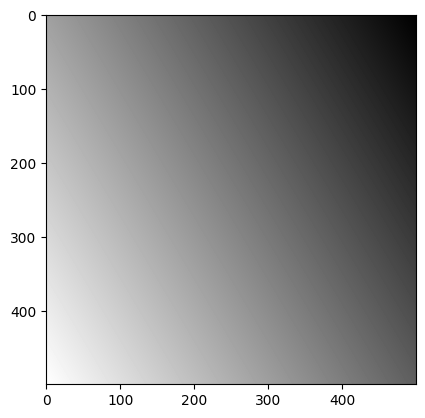

In [18]:
fundo = desentortar(imagem)[1]

plt.imshow(fundo, cmap='gray')

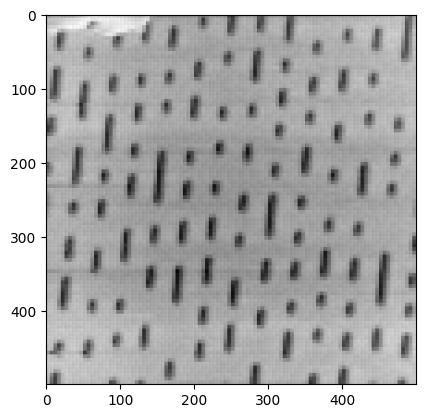

In [19]:
desentortada = desentortar(imagem)[0]

plt.imshow(desentortada,cmap='gray')

In [20]:
def normalizar(matriz_qualquer):
    max_antigo = matriz_qualquer.max()
    min_antigo = matriz_qualquer.min()
    max_novo = 255
    min_novo = 0
    
    matriz_normalizada = (matriz_qualquer - min_antigo) * (max_novo - min_novo) / (max_antigo - min_antigo) + min_novo
    return matriz_normalizada

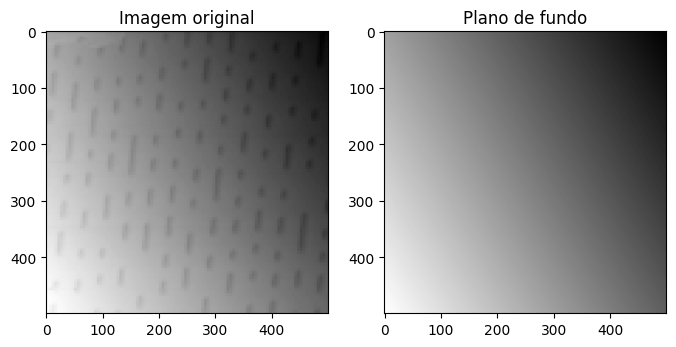

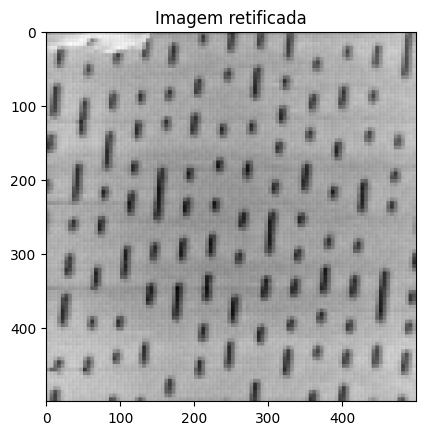

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Exibe a primeira imagem na primeira subtrama.
axs[0].imshow(imagem, cmap= 'gray')
axs[0].set_title('Imagem original')

# Exibe a segunda imagem na segunda subtrama.
axs[1].imshow(fundo, cmap= 'gray')
axs[1].set_title('Plano de fundo')

plt.show()

plt.imshow(desentortada, cmap= 'gray')
plt.title('Imagem retificada')
plt.show()


In [22]:
plano_normal = normalizar(desentortada)

In [23]:
def colorindo(imagem_cinza, matriz_cor):
    
    if matriz_cor.shape[0] != 3:
        return('Falha')
    
    cor_normalizada = matriz_cor/matriz_cor.max()
    
    
    linhas, colunas = imagem_cinza.shape
    matriz_colorida = np.empty((linhas, colunas, 3), dtype=int) 

    for i in range(linhas):
        for j in range(colunas):
            matriz_colorida[i, j] = imagem_cinza[i, j] * cor_normalizada
            
    
    
    return matriz_colorida



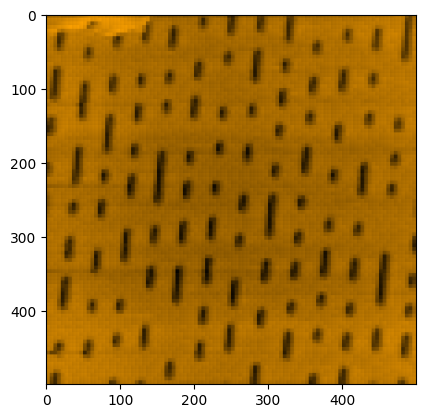

In [24]:
cor = np.array([238,152,0])

colorida = colorindo(plano_normal, cor)
plt.imshow(colorida)

In [31]:
def filtro_mediana(matriz_qualquer):

    kernel_size = 1
    altura, largura = matriz_qualquer.shape

    # Crie uma matriz vazia para a matriz suavizada
    matriz_suavizada = np.zeros((altura, largura), dtype=np.float32)

    # Faça loops for para percorrer cada elemento da matriz
    for i in range(altura):
        for j in range(largura):
            soma = 0
            contador = 0
            
            # Faça loops for para percorrer a vizinhança do elemento (i, j) com o tamanho do kernel
            for m in range(-kernel_size // 2, kernel_size // 2 + 1):
                for n in range(-kernel_size // 2, kernel_size // 2 + 1):
                    # Verifique se o elemento vizinho está dentro dos limites da matriz
                    if i + m >= 0 and i + m < altura and j + n >= 0 and j + n < largura:
                        soma += matriz_qualquer[i + m, j + n]
                        contador += 1
            
            # Calcule a média dos valores na vizinhança e defina o valor na matriz suavizada
            matriz_suavizada[i, j] = soma / contador

    return matriz_suavizada

Text(0.5, 1.0, 'Imagem 2')

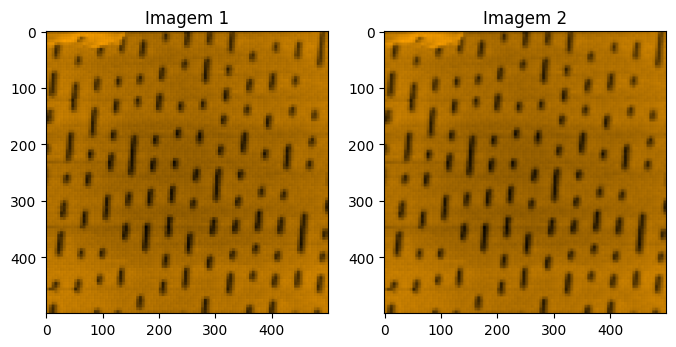

In [32]:
filtrada = colorindo(filtro_mediana(plano_normal),cor)

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Exibe a primeira imagem na primeira subtrama.
axs[0].imshow(colorida)
axs[0].set_title('Imagem 1')

# Exibe a segunda imagem na segunda subtrama.
axs[1].imshow(filtrada)
axs[1].set_title('Imagem 2')

[1] Como converter imagens em array NumPy? – Acervo Lima. Disponível em: <https://acervolima.com/como-converter-imagens-em-array-numpy/>. Acesso em: 23 set. 2023.

[2‌] Como remover elementos específicos de uma array NumPy? – Acervo Lima. Disponível em: <https://acervolima.com/como-remover-elementos-especificos-de-uma-array-numpy/>. Acesso em: 23 set. 2023.

‌